In [ ]:
##https://www.coursera.org/learn/data-science-coding-challenge-loan-default-prediction/home/week/1

In [28]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [29]:
plt.style.use('dark_background')

In [12]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [13]:
df = pd.read_csv("housing10k_data.csv")
df.head(2)

,SPID,PROP_ID,PREFERENCE,DESCRIPTION,PROPERTY_TYPE,CITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,REGISTER_DATE,POSTING_DATE,UPDATE_DATE,CLASS,RES_COM,PROP_NAME,PROPERTY_NUMBER,MIN_PRICE,MAX_PRICE,PRICE_SQFT,PROJ_ID,BUILDING_ID,VERIFIED,MAP_DETAILS,MIN_AREA_SQFT,MAX_AREA_SQFT,AMENITIES,ALT_TAG,PRODUCT_TYPE,TOP_USPS,EXPIRY_DATE,PROPERTY_TYPE__U,AREA,SECONDARY_AREA,PRICE,PROP_HEADING,VALUE_LABEL,CLASS_HEADING,CLASS_LABEL,REGISTER_DATE__U,REGISTERED_DAYS,PRIMARY_TAGS,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,SOCIETY_NAME,BUILDING_NAME,location,BALCONY_NUM,FLOOR_NUM
0,70597758,H70597758,S,"There is a 3 BHK apartment in Sector 113, Gurg...",Residential Apartment,Gurgaon,2.0,1,3.0,20202.0,0,0,5,25.0,N,"03rd Aug, 2023",1.691068e+12,1691067509000,B,R,La Vida by Tata Housing,1,31900000,31900000,20202.0,265503,427465,N,"{'LATITUDE': '28.532594', 'LONGITUDE': '77.020...",146.693837,146.693837,NaN,La Vida by Tata Housing Others,PSEUDO_LISTING,NaN,2023-10-02 00:00:00,1,1579 sq.ft.,146.69 sq.m.,3.19 Cr,3 BHK Flat in Sector 113 Gurgaon,Freehold,Builder,Builder,2023-08-03 18:28:26,3 weeks ago,[],"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",9.0,"[{'text': '1 Metro Station'}, {'text': '1 Shop...",La Vida by Tata Housing,La Vida by Tata Housing,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN...",NaN,1.0
1,70436188,H70436188,S,Let your dream of owning a flat come true with...,Residential Apartment,Gurgaon,2.0,1,3.0,9135.0,0,0,6,24.0,N,"26th Jul, 2023",1.690329e+12,1690328678000,A,R,Emaar Palm Heights,1,18500000,18500000,9135.0,319909,810299,N,"{'LATITUDE': '28.3855771', 'LONGITUDE': '76.97...",188.128575,188.128575,NaN,Emaar Palm Heights Others,PSEUDO_LISTING,NaN,2023-08-25 00:00:00,1,2025 sq.ft.,188.13 sq.m.,1.85 Cr,3 BHK Flat in Sector 77 Gurgaon,Freehold,Dealer: PROPHYPE REALTY SERVICES LLP,Dealer,2023-07-26 05:14:37,1 month ago,[],"['READY TO MOVE', 'NEW BOOKING', 'RERA']",12.0,"[{'text': '1 Metro Station'}, {'text': '1 Shop...",Emaar Palm Heights,Emaar Palm Heights,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN...",NaN,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10285 entries, 0 to 10284
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SPID                        10285 non-null  int64  
 1   PROP_ID                     10285 non-null  object 
 2   PREFERENCE                  10285 non-null  object 
 3   DESCRIPTION                 10285 non-null  object 
 4   PROPERTY_TYPE               10285 non-null  object 
 5   CITY                        10285 non-null  object 
 6   TRANSACT_TYPE               7498 non-null   float64
 7   OWNTYPE                     10285 non-null  int64  
 8   BEDROOM_NUM                 9273 non-null   float64
 9   PRICE_PER_UNIT_AREA         10285 non-null  float64
 10  FURNISH                     10285 non-null  int64  
 11  FACING                      10285 non-null  int64  
 12  AGE                         10285 non-null  int64  
 13  TOTAL_FLOOR                 102

In [14]:
df.shape

(10285, 55)

In [18]:
df.isnull().sum()

SPID                             0
PROP_ID                          0
PREFERENCE                       0
DESCRIPTION                      0
PROPERTY_TYPE                    0
CITY                             0
TRANSACT_TYPE                 2787
OWNTYPE                          0
BEDROOM_NUM                   1012
PRICE_PER_UNIT_AREA              0
FURNISH                          0
FACING                           0
AGE                              0
TOTAL_FLOOR                     54
FEATURES                         0
REGISTER_DATE                    0
POSTING_DATE                   464
UPDATE_DATE                      0
CLASS                            0
RES_COM                          0
PROP_NAME                     1861
PROPERTY_NUMBER                  0
MIN_PRICE                        0
MAX_PRICE                        0
PRICE_SQFT                       0
PROJ_ID                          0
BUILDING_ID                      0
VERIFIED                         0
MAP_DETAILS         

<Axes: ylabel='Missing values (in %)'>

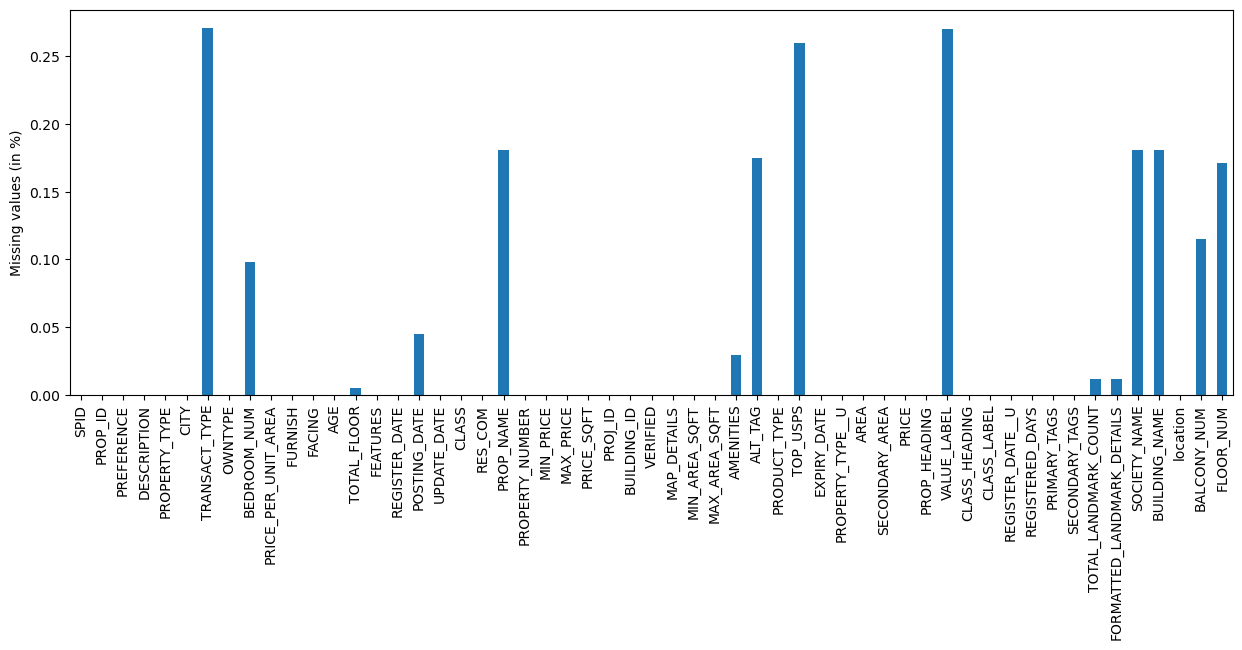

In [16]:
(
    df.isnull()
    .sum()
    .div(df.shape[0])
    .plot(kind='bar', figsize=(15, 5), ylabel='Missing values (in %)')
)

In [19]:
regular_cols = [
    'SPID',
    'PROP_ID',
    'CITY',
]

price_cols = [
    'PRICE',
    'MAX_PRICE',
    'MIN_PRICE',
    'PRICE_SQFT',
]

area_cols = [
    'AREA',
    'SECONDARY_AREA',
    'MAX_AREA_SQFT',
    'MIN_AREA_SQFT',
    'PRICE_PER_UNIT_AREA',
]

extra_cols = [
    'SECONDARY_TAGS',
    'TOTAL_LANDMARK_COUNT',
    'FORMATTED_LANDMARK_DETAILS',
    'MAP_DETAILS',
    'PROP_HEADING',
    'DESCRIPTION',
    'PROPERTY_TYPE',
    'location',
    'FURNISH',
    'FACING',
    'AGE',
    'TOTAL_FLOOR',
    'FEATURES',
]

missing_cols = [
    'BEDROOM_NUM',  # need to extract the BHK detials
    # 'BATHROOM_NUM',  # not available
    'AMENITIES',
    'PROP_NAME',
    'BALCONY_NUM',
    'FLOOR_NUM',
]

len(regular_cols), len(extra_cols), len(price_cols), len(area_cols), len(missing_cols)

(3, 13, 4, 5, 5)

In [20]:
all_cols = regular_cols + price_cols + area_cols + extra_cols + missing_cols
len(all_cols)

30

In [21]:
df = df[all_cols].copy()
df.shape

(10285, 30)

In [22]:
num_cols = df.select_dtypes(['float', 'int']).columns
cat_cols = df.select_dtypes('object').columns

len(cat_cols), len(num_cols)

(16, 8)

<Axes: ylabel='Missing values (in %)'>

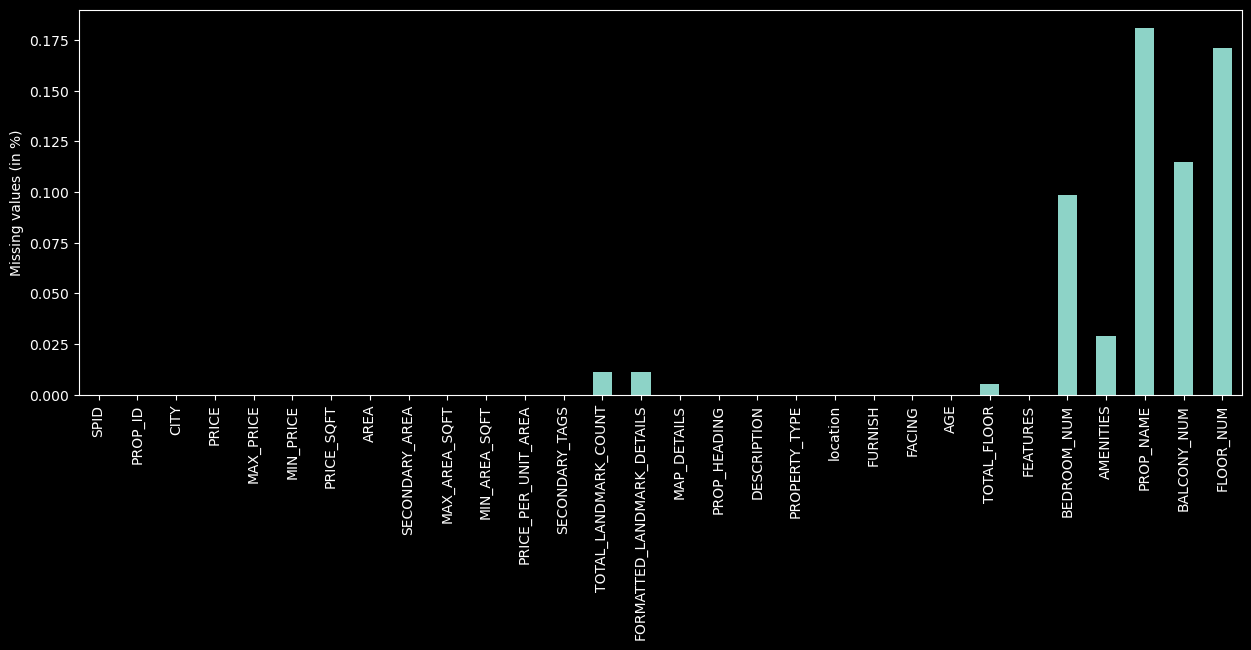

In [35]:
(
    df.isnull()
    .sum()
    .div(df.shape[0])
    .plot(kind='bar', figsize=(15, 5), ylabel='Missing values (in %)')
)

In [24]:
df['PROP_ID'].duplicated().sum()

27

In [25]:
df['CITY'].value_counts()

Gurgaon    10285
Name: CITY, dtype: int64

In [26]:
df['PROPERTY_TYPE'].value_counts()

Residential Apartment        5982
Independent/Builder Floor    2488
Residential Land              999
Independent House/Villa       638
Farm House                    120
Studio Apartment               43
Serviced Apartments            11
Other                           4
Name: PROPERTY_TYPE, dtype: int64

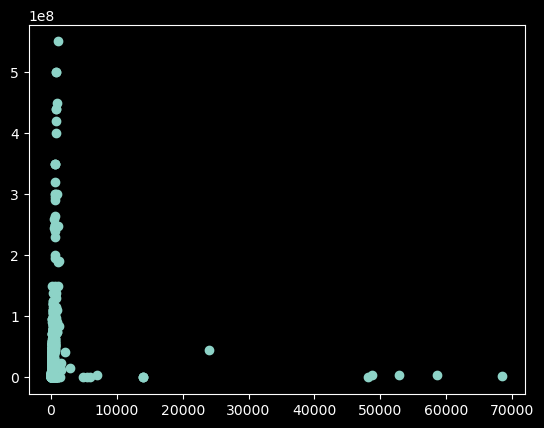

In [30]:
temp = df.query("PROPERTY_TYPE=='Residential Apartment'")
plt.scatter(temp['MIN_AREA_SQFT'], temp['MIN_PRICE'])

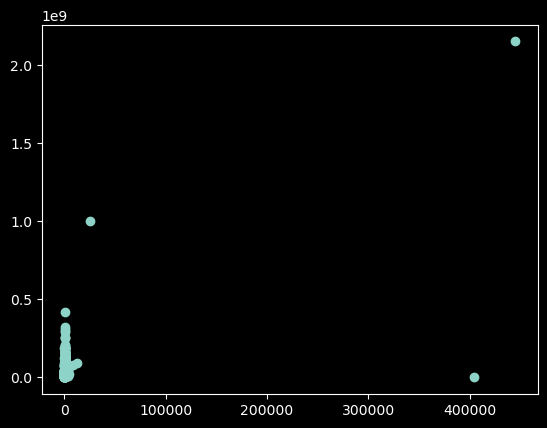

In [31]:
temp = df.query("PROPERTY_TYPE=='Residential Land'")
plt.scatter(temp['MIN_AREA_SQFT'], temp['MIN_PRICE'])

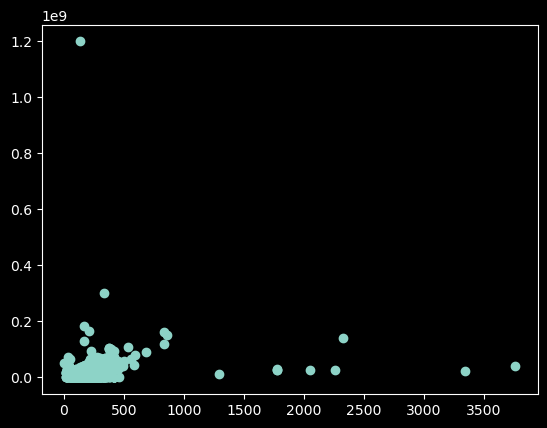

In [32]:
temp = df.query("PROPERTY_TYPE=='Independent/Builder Floor'")
plt.scatter(temp['MIN_AREA_SQFT'], temp['MIN_PRICE'])

In [34]:
df.to_csv('gurgaon_10k.csv', index=False)